In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from scipy.stats import f_oneway, pearsonr, spearmanr
import os 

In [36]:
data = pd.read_csv("../Data/BigCitiesHealth.csv")

# 1. Getting an overview

In [ ]:
#### Getting a brief overview of the Data Set ####
# Exploring basics of Data Set
print("################## Basics of original Data Set ###################")
n_rows = data.shape[0]
n_columns = data.columns.shape[0]
print("Number of Rows: ", n_rows)
print("Number of Columns: ", n_columns)

# Missing Data
print("################## Missing Data ###################")
missing_summary = data.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Values']
# print(missing_summary)

# Sum of missing Data
missing_sum = data.isna().sum().sum()
print("Sum of missing Data: ", missing_sum) 

# Save missing data directly to Excel
missing_summary.to_excel("../Output/1. Data_Exploration_Summary.xlsx", sheet_name="Missing Data Details", index=False)
print("\nData exploration results saved to: Data_Exploration_Summary.xlsx")

# Features
print("To explore Research Question following features are observed: ")
features =  ("strata_race_label", 
             "strata_sex_label", 
             "geo_strata_poverty", 
             "geo_strata_region", 
             "geo_strata_PopDensity"
             )
print(features)

# Target Metrics
metrics = [
    'Cardiovascular Disease Deaths',
    'Diabetes Deaths',
    'Injury Deaths',
    'All Cancer Deaths'
]

print("\n################## Metrics ###################")

# All Metrics
metrics = data["metric_item_label"].unique()
print(metrics)

################## Basics of original Data Set ###################
Number of Rows:  148292
Number of Columns:  31
################## Missing Data ###################
Sum of missing Data:  764739

Data exploration results saved to: Data_Exploration_Summary.xlsx
To explore Research Question following features are observed: 
('strata_race_label', 'strata_sex_label', 'geo_strata_poverty', 'geo_strata_region', 'geo_strata_PopDensity')

################## Metrics ###################
['COVID-19 Deaths' 'Diabetes Deaths' 'Walking to Work'
 'Deaths from All Causes' 'Life Expectancy' 'Uninsured, All Ages'
 'Uninsured, Child' 'Dental Care' 'Prenatal Care'
 'People with Disabilities' 'Teen Asthma' 'All Cancer Deaths'
 'Breast Cancer Deaths' 'Lung Cancer Deaths'
 'Cardiovascular Disease Deaths' 'Heart Disease Deaths'
 'High Blood Pressure' 'Diabetes' 'Adult Obesity' 'Teen Obesity'
 'Adult Physical Inactivity' 'Teen Physical Activity Levels'
 'Teen Physical Inactivity' 'Teen Physical Education' 'Tee

# 2. Metrics Analysis

Total of Health Metrics:  29
Total of Health Metrics:  15

Significance Analysis for Health Metrics:
                               ANOVA p-value  Pearson Correlation  \
Diabetes Deaths                 0.000000e+00            -0.031636   
Life Expectancy                 0.000000e+00             1.000000   
All Cancer Deaths               0.000000e+00             0.051119   
Breast Cancer Deaths           1.033231e-252            -0.016808   
Lung Cancer Deaths              0.000000e+00             0.089930   
Cardiovascular Disease Deaths   0.000000e+00             0.003302   
Heart Disease Deaths            0.000000e+00             0.030034   
High Blood Pressure             2.617143e-77            -0.069898   
Diabetes                        6.239551e-67            -0.013907   
Pneumonia or Influenza Deaths   0.000000e+00            -0.016534   
Maternal Deaths                4.308385e-121            -0.208884   
Infant Deaths                  3.124807e-228            -0.163017   
Lo

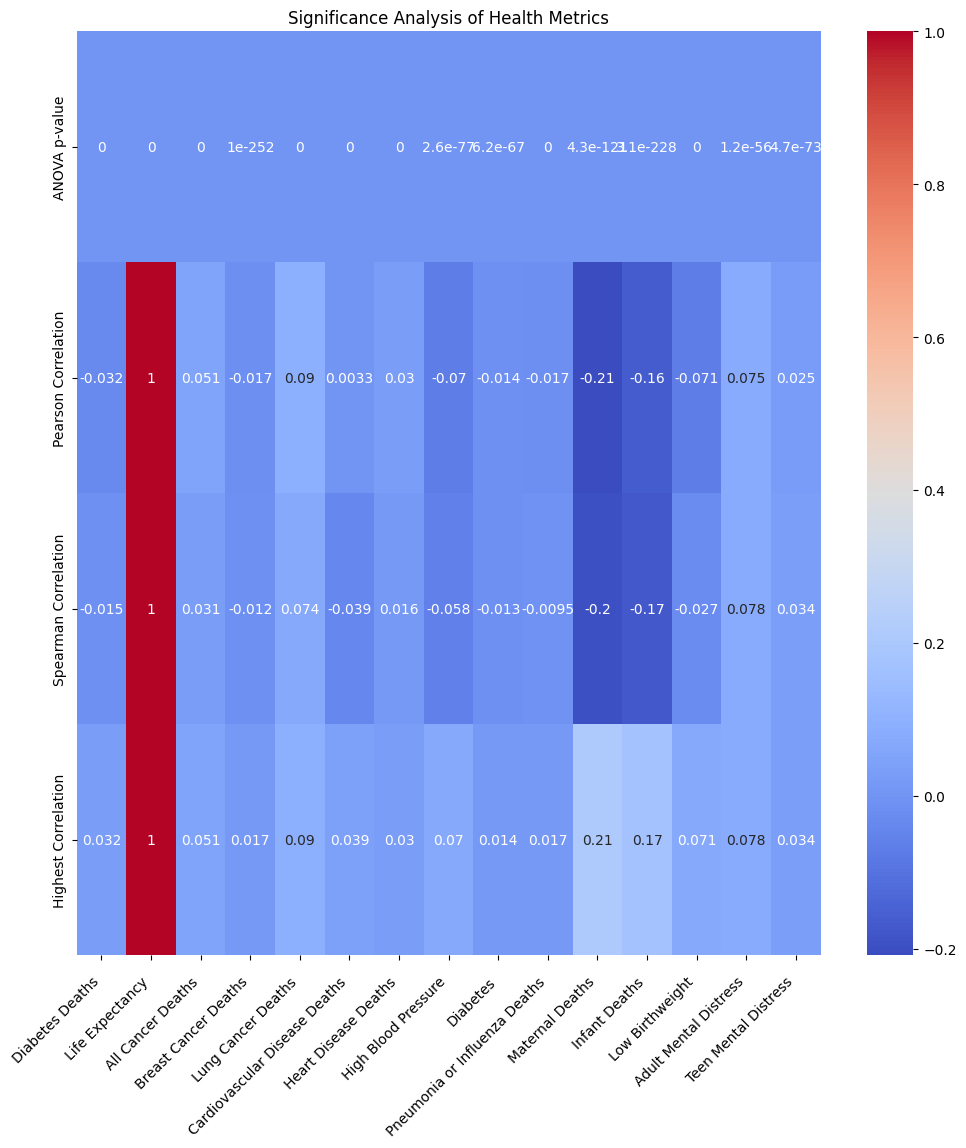


Final Metric Selection:  
['Lung Cancer Deaths', 'Low Birthweight', 'Maternal Deaths', 'Life Expectancy', 'Infant Deaths', 'Adult Mental Distress', 'High Blood Pressure']


In [ ]:
# All demographic features
features = [
    'strata_race_label',
    'strata_sex_label',
    'geo_strata_poverty',
    'geo_strata_Segregation',
    'geo_strata_region',
    'geo_strata_PopDensity',
    'geo_strata_Population'
]

# metric_item_label s that are demographics
# features_row = ['Poverty in All Ages', 'Poverty and Near Poverty in All Ages', 'Poverty in Children', 'Per-capita Household Income', 'Households with Higher-Incomes', 'Racial Segregation, White and non-White', 'Racial Segregation, White and Black', 'Racial Segregation, White and Asian', 'Racial Segregation, White and Hispanic', 'Population Density','Homelessness, Non-Whites', 'Homelessness, Children', 'Homelessness and Vacant Housing']


# Alle Gesundheitsmetriken
all_metrics = data['metric_item_label'].unique().tolist()
# all_metrics =  ['COVID-19 Deaths', 'Diabetes Deaths', 'Walking to Work', 'Deaths from All Causes', 'Life Expectancy', 'Uninsured, All Ages', 'Uninsured, Child', 'Dental Care', 'Prenatal Care', 'People with Disabilities', 'Teen Asthma', 'All Cancer Deaths', 'Breast Cancer Deaths', 'Lung Cancer Deaths', 'Cardiovascular Disease Deaths', 'Heart Disease Deaths', 'High Blood Pressure', 'Diabetes', 'Adult Obesity', 'Teen Obesity', 'Adult Physical Inactivity', 'Teen Physical Activity Levels', 'Teen Physical Inactivity', 'Teen Physical Education', 'Teen Computer Time', 'Teen TV Time', 'Teen Soda', 'Teen Breakfast', 'Flu Vaccinations, Medicare', 'Pneumonia or Influenza Deaths', 'New Tuberculosis Cases', 'HIV-Related Deaths', 'HIV/AIDS Prevalence', 'New Chlamydia Cases', 'Syphilis Prevalence', 'Syphilis, Newborns', 'New Gonorrhea Cases', 'Maternal Deaths', 'Infant Deaths', 'Low Birthweight', 'Teen Births', 'Teen Birth Control', 'Opioid Overdose Deaths', 'Adult Binge Drinking', 'Drug Overdose Deaths', 'Adult Smoking', 'Teen Smoking', 'Teen Alcohol', 'Teen Marijuana', 'Adult Mental Distress', 'Suicide', 'Teen Mental Distress', 'Teen Suicidal Ideation', 'Electronic Bullying', 'School Bullying', 'Child Lead Testing', 'Child Lead Levels 5+ mcg/dL', 'Child Lead Levels 10+ mcg/dL', 'Housing Lead Risk', 'Injury Deaths', 'Firearm Deaths', 'Motor Vehicle Deaths', 'Police Killings', 'Racial Disparity in Police Killings', 'Violent Crime', 'Homicides', 'Weapons in School', 'Fighting in School', 'Vacant Housing Units', 'Owner Occupied Housing', 'Renters vs. Owners', 'Preschool Enrollment', 'College Graduates', 'Poverty in All Ages', 'Poverty and Near Poverty in All Ages', 'Poverty in Children', 'Per-capita Household Income', 'Households with Higher-Incomes', 'Public Assistance', 'Unemployment', 'Service Workers', 'Excessive Housing Cost', 'Household Income Inequality', 'Income Inequality', 'Racial Segregation, White and non-White', 'Racial Segregation, White and Black', 'Racial Segregation, White and Asian', 'Racial Segregation, White and Hispanic', 'Limited Supermarket Access', 'Riding Bike to Work', 'Premature Death', 'Lack of Car', 'Public Transportation Use', 'Drives Alone to Work', 'Longer Driving Commute Time', 'Poor Air Quality', 'Hazardous Air Quality', 'Single-Parent Families', 'Population Density', 'Children', 'Seniors', 'Minority Population', 'Primarily Speak English', 'Primarily Speak Chinese', 'Primarily Speak Spanish', 'Foreign Born Population', 'Homelessness, Non-Whites', 'Homelessness, Children', 'Homelessness and Vacant Housing']
# print("All metrics: ", metrics)

# Nur Gesundheitsmetriken
health_metrics = ['COVID-19 Deaths', 'Diabetes Deaths', 'Deaths from All Causes', 'Life Expectancy','Teen Asthma', 'All Cancer Deaths', 'Breast Cancer Deaths', 'Lung Cancer Deaths', 'Cardiovascular Disease Deaths', 'Heart Disease Deaths', 'High Blood Pressure', 'Diabetes', 'Adult Obesity', 'Teen Obesity', 'Pneumonia or Influenza Deaths', 'New Tuberculosis Cases', 'HIV-Related Deaths', 'HIV/AIDS Prevalence', 'New Chlamydia Cases', 'Syphilis Prevalence', 'Syphilis', 'New Gonorrhea Cases', 'Maternal Deaths', 'Infant Deaths', 'Low Birthweight','Adult Mental Distress', 'Suicide', 'Teen Mental Distress', 'Teen Suicidal Ideation']

print("Total of Health Metrics: ", len(health_metrics))      # Result:   Total of 29 health metrics


relevant_metrics = [
    'Diabetes Deaths', 'Life Expectancy',                                           #'Deaths from All Causes' includes accidents, therefore not part of this list!
    'All Cancer Deaths', 'Breast Cancer Deaths', 'Lung Cancer Deaths', 
    'Cardiovascular Disease Deaths', 'Heart Disease Deaths', 'High Blood Pressure', 
    'Diabetes', 'Pneumonia or Influenza Deaths', 'Maternal Deaths', 'Infant Deaths', 
    'Low Birthweight', 'Adult Mental Distress', 'Teen Mental Distress'           # Obesity is a Riskfactor, not a Metric
    ]
print("Total of Health Metrics: ", len(relevant_metrics))      # Result:   Total of 16 health metrics

# Überprüfen, ob die Features existieren
missing_features = [f for f in features if f not in data.columns]
if missing_features:
    print(f"Fehler: Die folgenden Features fehlen im Datensatz: {missing_features}")
else:
    # Daten filtern
    filtered_data = data[data['metric_item_label'].isin(relevant_metrics)]

    if filtered_data.empty:
        print("Fehler: Keine relevanten Gesundheitsmetriken im Datensatz.")
    else:
        # Signifikanzanalyse (ANOVA, Pearson, Spearman)
        stat_results = {}
        for metric in relevant_metrics:
            metric_data = filtered_data[filtered_data['metric_item_label'] == metric]

            if not metric_data.empty:
                groups = []
                for feature in features:
                    for value in metric_data[feature].dropna().unique():
                        group_values = metric_data[metric_data[feature] == value]['value'].dropna().values
                        if len(group_values) > 1:
                            groups.append(group_values)

                if len(groups) > 1:
                    try:
                        f_stat, p_value_anova = f_oneway(*groups)
                    except ValueError:
                        p_value_anova = np.nan
                else:
                    p_value_anova = np.nan

                # Pearson und Spearman Korrelationsanalyse
                if 'Life Expectancy' in relevant_metrics:
                    life_expectancy = filtered_data[filtered_data['metric_item_label'] == 'Life Expectancy']['value'].dropna().values
                    target_values = metric_data['value'].dropna().values

                    # Länge beider Arrays angleichen
                    min_length = min(len(target_values), len(life_expectancy))
                    target_values = target_values[:min_length]
                    life_expectancy = life_expectancy[:min_length]

                    if len(target_values) > 1:
                        pearson_corr = np.corrcoef(target_values, life_expectancy)[0, 1]
                        spearman_corr, _ = spearmanr(target_values, life_expectancy)
                    else:
                        pearson_corr = np.nan
                        spearman_corr = np.nan
                else:
                    pearson_corr = np.nan
                    spearman_corr = np.nan

                stat_results[metric] = {
                    'ANOVA p-value': p_value_anova,
                    'Pearson Correlation': pearson_corr,
                    'Spearman Correlation': spearman_corr
                }

        # Ergebnisse anzeigen
        stat_df = pd.DataFrame(stat_results).T
        print("\nSignificance Analysis for Health Metrics:")
        print(stat_df)

        # Signifikante und stark korrelierte Features
        significant_features = stat_df[stat_df['ANOVA p-value'] < 0.05].index.tolist()
        stat_df['Highest Correlation'] = stat_df[['Pearson Correlation', 'Spearman Correlation']].abs().max(axis=1).fillna(0)
        top_10_high_corr = stat_df['Highest Correlation'].nlargest(7).index.tolist()

        significant_and_correlated = list(set(significant_features) & set(top_10_high_corr)) # deadliest features

        print("\nSignificant Features:", significant_features)
        print("\nStrong correlating Features:", top_10_high_corr)

        # Visualisierung der Signifikanz
        plt.figure(figsize=(12, 12))
        if not stat_df.empty:
            ax = sns.heatmap(stat_df.dropna().T, cmap='coolwarm', annot=True)
            # Rotate and align x-axis labels
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.tick_params(axis='x', pad=10)
        else:
            print("No significabt Results for Pearson and Spearman.")

        plt.title("Significance Analysis of Health Metrics")
        plt.savefig("../Output/2. Statistical Correlation of Metrics.jpg")
        plt.show()

        # Speicherung der Ergebnisse
        stat_df.to_excel("../Output/2. Health_Metrics_Significance_Analysis.xlsx")


# Metrics for future codes:
metrics = significant_and_correlated
print(f"\nFinal Metric Selection:  \n{metrics}")


# Final Metric Selection - based on code and Interpretation
# So the metrics should be with settings from 19.05 = ['Lung Cancer Deaths', 'Adult Mental Distress', 'Infant Deaths', 'Life Expectancy', 'High Blood Pressure', 'Low Birthweight', 'Maternal Deaths']
# Small Check: print(len(metrics))


# 3. Features Selection

In [38]:
# Definiere die Zielmetriken und demographischen Merkmale
metrics = data["metric_item_label"].unique()
print("All metrics: ", metrics)

# Metrics - Results from 2. Metric Evaluation
targets = ['Lung Cancer Deaths', 'Adult Mental Distress', 'Infant Deaths', 
           'Life Expectancy', 'High Blood Pressure', 'Low Birthweight', 'Maternal Deaths']

features = [
    'strata_race_label',
    'strata_sex_label',
    'geo_strata_poverty',
    'geo_strata_Segregation',
    'geo_strata_region',
    'geo_strata_PopDensity',
    'geo_strata_Population'
]

# Speichere ANOVA-Ergebnisse für alle Features
anova_results_all_features = []
anova_results_per_target = []
sign_feature = []

# Zählt, wie oft jedes Feature signifikant ist
feature_significance_count = {feature: 0 for feature in features}

for target in targets:
    print(f"\nProcessing Metric: {target}")
    df_metric = data[data['metric_item_label'] == target].dropna(subset=features + ['value'])

    # ANOVA für alle Features
    for feature in features:
        groups = [group['value'].values for _, group in df_metric.groupby(feature) if len(group) > 1]
        if len(groups) > 1:
            f_stat, p_value = f_oneway(*groups)
            significance = "Yes" if p_value < 0.05 else "No"
            anova_results_per_target.append({
                'Metric': target,
                'Feature': feature,
                'F-Statistic': round(f_stat, 4),
                'p-value': round(p_value, 4),
                'Significant': significance
            })
            
            # Zählt Signifikanz für jedes Feature
            if p_value < 0.05:
                feature_significance_count[feature] += 1



# Ergebnisse in einem DataFrame speichern
anova_df_per_target = pd.DataFrame(anova_results_per_target)

# Sicherstellen, dass der Pfad existiert
output_path = os.path.join(os.getcwd(), "../Output/3. ANOVA_Results_Comparison.xlsx")

with pd.ExcelWriter(output_path) as writer:
    anova_df_per_target.to_excel(writer, sheet_name="ANOVA_Per_Target", index=False)

#print(f"\nANOVA-Ergebnisse erfolgreich in {output_path} gespeichert.")


# Lade die ANOVA-Ergebnistabelle aus der hochgeladenen Excel-Datei
anova_df = pd.read_excel(output_path, sheet_name="ANOVA_Per_Target")

# Identifiziere die Features, die in allen Zeilen "Yes" für "Significant" haben
features = []


# Überprüfe für jedes Feature, ob es maximal ein "No" für "Significant" hat
for feature in anova_df['Feature'].unique():
    no_count = anova_df[(anova_df['Feature'] == feature) & (anova_df['Significant'] == 'No')].shape[0]
    
    # Nur hinzufügen, wenn es maximal ein "No" gibt
    if no_count <= 1:
        features.append(feature)

# Ausgabe
print(f"\nFinal Feature Selection: \n{features}")

All metrics:  ['COVID-19 Deaths' 'Diabetes Deaths' 'Walking to Work'
 'Deaths from All Causes' 'Life Expectancy' 'Uninsured, All Ages'
 'Uninsured, Child' 'Dental Care' 'Prenatal Care'
 'People with Disabilities' 'Teen Asthma' 'All Cancer Deaths'
 'Breast Cancer Deaths' 'Lung Cancer Deaths'
 'Cardiovascular Disease Deaths' 'Heart Disease Deaths'
 'High Blood Pressure' 'Diabetes' 'Adult Obesity' 'Teen Obesity'
 'Adult Physical Inactivity' 'Teen Physical Activity Levels'
 'Teen Physical Inactivity' 'Teen Physical Education' 'Teen Computer Time'
 'Teen TV Time' 'Teen Soda' 'Teen Breakfast' 'Flu Vaccinations, Medicare'
 'Pneumonia or Influenza Deaths' 'New Tuberculosis Cases'
 'HIV-Related Deaths' 'HIV/AIDS Prevalence' 'New Chlamydia Cases'
 'Syphilis Prevalence' 'Syphilis, Newborns' 'New Gonorrhea Cases'
 'Maternal Deaths' 'Infant Deaths' 'Low Birthweight' 'Teen Births'
 'Teen Birth Control' 'Opioid Overdose Deaths' 'Adult Binge Drinking'
 'Drug Overdose Deaths' 'Adult Smoking' 'Teen Smok